11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/Users/sakurako/Lecture/BohPJ/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - accuracy: 0.8756 - loss: 0.4393
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9654 - loss: 0.1204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.9764 - loss: 0.0791
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9827 - loss: 0.0582
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9861 - loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9735 - loss: 0.0895
Test Accuracy: 0.9751


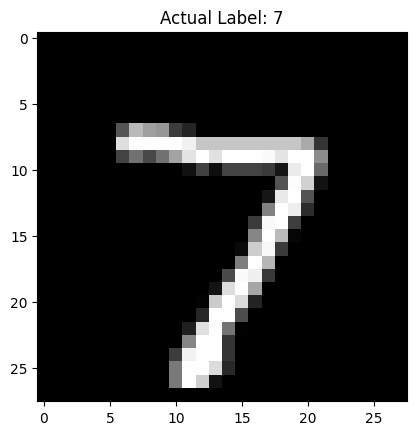

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label: 7


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# MNISTデータを読み込む（手書き数字：0〜9）
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 正規化（0〜255の値を0〜1に）
x_train, x_test = x_train / 255.0, x_test / 255.0

# モデルの構築（単純なニューラルネットワーク）
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),        # 28x28の画像を1次元に
    tf.keras.layers.Dense(128, activation='relu'),        # 隠れ層（128ユニット）
    tf.keras.layers.Dense(10, activation='softmax')       # 出力層（0〜9の10クラス）
])

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 学習
model.fit(x_train, y_train, epochs=5)

# 精度評価
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# テスト画像を1枚表示して予測
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Actual Label: {y_test[0]}")
plt.show()

# 予測
predictions = model.predict(np.array([x_test[0]]))
predicted_label = np.argmax(predictions)
print(f"Predicted Label: {predicted_label}")
